In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
data=pd.read_csv(r'C:\Users\Anila John\Downloads\Country-data.csv')
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [65]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [67]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [68]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [69]:
X=data.iloc[:,1:10]
X.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [70]:
# Normalization
from sklearn.preprocessing import Normalizer
norm = Normalizer()
X_norm = norm.fit_transform(X)

In [71]:
# K-means Clustering

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X_norm)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)

C:\Users\Anila John\Anaconda3\Anaconda00\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


5.56547363590342
1.6396610012586132
0.8446384593352135
0.6119593552562793
0.49325571957342546
0.37657405009860473
0.3067207644234218
0.2598073591174682
0.22777934259324284
0.1921210153994717


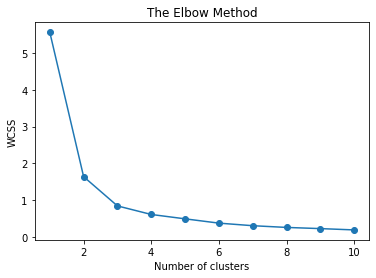

In [72]:
plt.plot(range(1,11),wcss,'-o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [73]:
kmeans = KMeans(n_clusters = 3,init= 'k-means++',random_state=42)
clusters_kmean= kmeans.fit_predict(X_norm)
type(X_norm)
clusters_kmean

array([1, 1, 1, 2, 2, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 0, 2,
       0, 2, 2, 1, 1, 2, 1, 2, 2, 0, 0, 2, 1, 1, 0, 1, 0, 2, 1, 2, 1, 2,
       1, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 1,
       1, 1, 2, 0, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1,
       0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 2, 2, 0, 2, 2, 2, 0, 1, 2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 2, 1, 2,
       1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 1, 1])

In [74]:
data["cluster1"]=kmeans.fit_predict(X_norm)
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster1
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


In [75]:
cluster_mean1=data.groupby(['cluster1']).mean()
cluster_mean1

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster1,,,,,,,,,
0,10.545455,42.875758,9.866667,45.257576,34696.060606,3.503455,78.403030,2.103333,38552.121212
1,55.420732,33.628037,6.010732,43.103243,8538.829268,10.554524,66.456098,3.466585,3494.060976
2,28.819231,51.784615,6.148846,53.898077,19577.096154,6.124635,72.040385,2.666154,11659.250000


In [76]:
data['cluster1'].value_counts()

1    82
2    52
0    33
Name: cluster1, dtype: int64

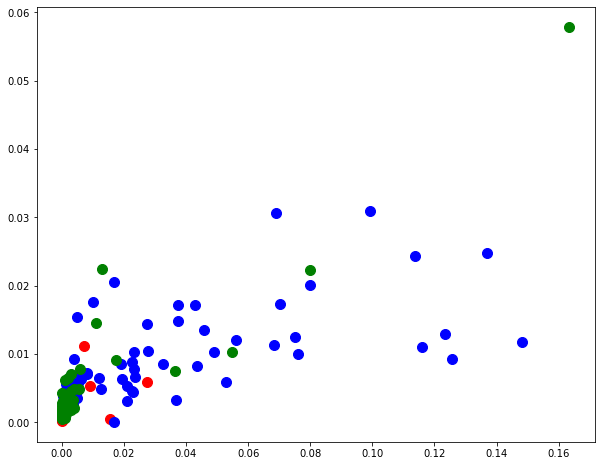

In [77]:
plt.figure(figsize=(10,8))
plt.scatter(X_norm[clusters_kmean==0,0],X_norm[clusters_kmean==0,1],s=100,c='red',label='cluster 1')
plt.scatter(X_norm[clusters_kmean==1,0],X_norm[clusters_kmean==1,1],s=100,c='blue',label='cluster 2')
plt.scatter(X_norm[clusters_kmean==2,0],X_norm[clusters_kmean==2,1],s=100,c='green',label='cluster 3')

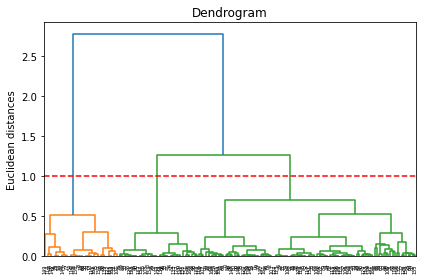

In [78]:
#Hierarchial Clustering

import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(X_norm,method="ward"))
plt.title("Dendrogram")
plt.ylabel("Euclidean distances")
plt.hlines(1,0,5000,colors ="r",linestyles = "dashed")
plt.tight_layout()
plt.show()


In [79]:
from sklearn.cluster import AgglomerativeClustering

In [80]:
# optimum number of cluster is 3
hc=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
clusters_hc=hc.fit_predict(X_norm)
clusters_hc

array([0, 0, 0, 2, 2, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 2, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0,
       0, 2, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0,
       0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 2, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2,
       0, 0, 0, 2, 1, 1, 2, 0, 1, 1, 0, 0, 0], dtype=int64)

In [81]:
data["cluster2"]=hc.fit_predict(X_norm)
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster1,cluster2
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,2


In [82]:
cluster_mean2=data.groupby(['cluster2']).mean()
cluster_mean2

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster1
cluster2,,,,,,,,,,
0,54.597959,36.503051,5.887755,44.711897,9760.642857,10.208990,66.818367,3.469490,4258.306122,1.163265
1,10.545455,42.875758,9.866667,45.257576,34696.060606,3.503455,78.403030,2.103333,38552.121212,0.000000
2,19.236111,52.027778,6.545000,54.316667,21156.944444,5.096417,73.536111,2.302500,13207.777778,2.000000


In [83]:
data['cluster2'].value_counts()

0    98
2    36
1    33
Name: cluster2, dtype: int64

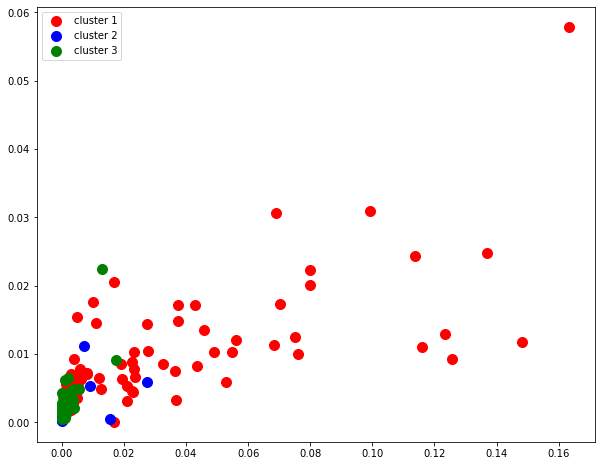

In [84]:
plt.figure(figsize=(10,8))
plt.scatter(X_norm[clusters_hc==0,0],X_norm[clusters_hc==0,1],s=100,c='red',label='cluster 1')
plt.scatter(X_norm[clusters_hc==1,0],X_norm[clusters_hc==1,1],s=100,c='blue',label='cluster 2')
plt.scatter(X_norm[clusters_hc==2,0],X_norm[clusters_hc==2,1],s=100,c='green',label='cluster 3')
plt.legend()
plt.show()

In [85]:
# PCA

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_data=sc.fit_transform(X)
scaled_data=pd.DataFrame(scaled_data,columns=X.columns)
scaled_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-2.659217e-17,2.383323e-16,5.218713e-16,2.871954e-16,-7.512288e-17,3.988825e-18,3.616535e-16,3.124580e-16,2.127373e-17
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-8.871383e-01,-1.500192e+00,-1.827827e+00,-1.939940e+00,-8.603259e-01,-1.137852e+00,-4.337186e+00,-1.191250e+00,-6.968005e-01
25%,-7.466190e-01,-6.333367e-01,-6.922106e-01,-6.914785e-01,-7.174558e-01,-5.666409e-01,-5.927576e-01,-7.639023e-01,-6.366596e-01
50%,-4.717981e-01,-2.235279e-01,-1.810007e-01,-1.487432e-01,-3.738080e-01,-2.269504e-01,2.869576e-01,-3.564309e-01,-4.544309e-01
75%,5.926666e-01,3.747198e-01,6.515412e-01,4.913530e-01,2.942370e-01,2.816364e-01,7.042584e-01,6.175252e-01,5.942100e-02
max,4.221297e+00,5.813835e+00,4.047436e+00,5.266181e+00,5.611542e+00,9.129718e+00,1.380962e+00,3.009349e+00,5.036507e+00


In [86]:
from sklearn.decomposition import PCA

In [87]:
pca=PCA(0.80)

In [88]:
x_pca=pca.fit_transform(scaled_data)
x_pca.shape

(167, 4)

C:\Users\Anila John\Anaconda3\Anaconda00\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'PC2')

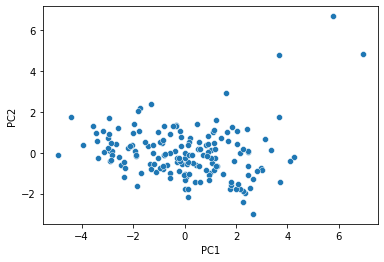

In [89]:
sns.scatterplot(x_pca[:,0],x_pca[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")

K Means clustering after PCA

In [90]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit(x_pca)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)

C:\Users\Anila John\Anaconda3\Anaconda00\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1310.477515687794
859.0954098354575
643.3530304947252
514.2073501405227
446.4590617016484
396.6556743592219
361.7029437163461
318.58107661461946
291.62911144194936
269.6523228705578


Text(0.5, 1.0, 'The Elbow Method')

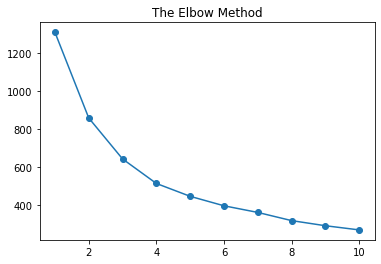

In [91]:
plt.plot(range(1,11),wcss,'-o')
plt.title("The Elbow Method")

In [92]:
# optimal number of clusters is 5

from sklearn.cluster import KMeans
model_kmeans=KMeans(n_clusters=5)
model_kmeans.fit(x_pca)
data['cluster3']=model_kmeans.predict(x_pca)
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster1,cluster2,cluster3
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,0,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,0,3
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2,2,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,2,1


In [93]:
cluster_mean3=data.groupby(['cluster3']).mean()
cluster_mean3

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster1,cluster2
cluster3,,,,,,,,,,,
0,5.100000,44.848148,9.361111,37.981481,46833.333333,2.891963,80.437037,1.838519,45322.222222,0.259259,1.000000
1,16.673684,49.343860,6.952281,58.578947,14071.228070,3.806211,73.600000,2.107544,8490.456140,1.385965,0.877193
2,96.785714,29.160000,6.626429,44.264286,3500.309524,11.562500,58.504762,5.085952,1768.333333,1.166667,0.190476
3,32.252632,28.657342,5.013158,29.922787,12039.210526,13.460526,71.428947,2.757632,5536.526316,1.236842,0.394737
4,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667,1.333333,1.666667


In [94]:
data['cluster3'].value_counts()

1    57
2    42
3    38
0    27
4     3
Name: cluster3, dtype: int64

In [95]:
data.loc[data['cluster3']==1]['country'].to_list()

['Albania',
 'Antigua and Barbuda',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belarus',
 'Belize',
 'Bhutan',
 'Bosnia and Herzegovina',
 'Bulgaria',
 'Cambodia',
 'Cape Verde',
 'Chile',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Georgia',
 'Grenada',
 'Guyana',
 'Hungary',
 'Jordan',
 'Kyrgyz Republic',
 'Latvia',
 'Lebanon',
 'Lithuania',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Mauritius',
 'Micronesia, Fed. Sts.',
 'Moldova',
 'Montenegro',
 'Morocco',
 'Panama',
 'Paraguay',
 'Poland',
 'Romania',
 'Samoa',
 'Serbia',
 'Seychelles',
 'Slovak Republic',
 'Slovenia',
 'Solomon Islands',
 'South Korea',
 'St. Vincent and the Grenadines',
 'Suriname',
 'Thailand',
 'Tunisia',
 'Turkmenistan',
 'Ukraine',
 'Uruguay',
 'Vanuatu',
 'Vietnam']

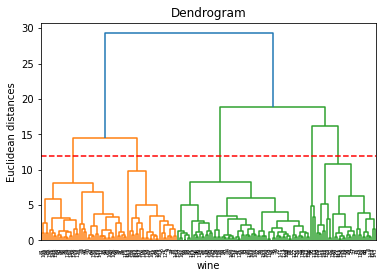

In [96]:
# HC model after pca

dendrogram=sch.dendrogram(sch.linkage(x_pca,method="ward"))
plt.title("Dendrogram")
plt.xlabel("wine")
plt.ylabel("Euclidean distances")
plt.hlines(12,0,5000,colors ="r",linestyles = "dashed")

In [97]:
# optimum number of cluster is 5

from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="ward")
clusters_hc=hc.fit_predict(x_pca)
clusters_hc

array([4, 2, 1, 4, 2, 1, 2, 0, 0, 1, 2, 0, 1, 2, 2, 0, 2, 4, 2, 1, 2, 4,
       2, 0, 2, 4, 4, 2, 4, 0, 2, 4, 4, 2, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2,
       0, 2, 2, 1, 2, 4, 1, 2, 2, 0, 0, 1, 4, 2, 0, 4, 0, 2, 2, 4, 4, 2,
       4, 2, 0, 1, 1, 1, 4, 0, 2, 0, 2, 0, 2, 1, 4, 4, 0, 2, 4, 2, 2, 4,
       4, 0, 2, 3, 2, 4, 4, 2, 2, 4, 3, 4, 2, 4, 2, 1, 2, 2, 4, 1, 4, 1,
       0, 0, 4, 1, 0, 0, 1, 2, 2, 2, 1, 2, 0, 0, 2, 1, 4, 2, 0, 4, 2, 2,
       4, 3, 2, 2, 4, 4, 2, 0, 1, 2, 1, 2, 0, 0, 4, 4, 2, 1, 4, 2, 2, 2,
       2, 4, 2, 0, 0, 0, 2, 1, 2, 1, 2, 1, 4], dtype=int64)

In [98]:
data["cluster4"]=hc.fit_predict(x_pca)
data.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster1,cluster2,cluster3,cluster4
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,1,0,2,4
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,1,0,1,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,1,0,3,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,2,2,2,4
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,2,2,1,2
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,2,2,3,1
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,1,0,3,2
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0,1,0,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0,1,0,0
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,1,0,3,1


In [99]:
data.groupby(data["cluster4"]).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster1,cluster2,cluster3
cluster4,,,,,,,,,,,,
0,6.190000,47.543333,8.701000,38.660000,46543.333333,4.358433,79.790000,1.901333,42150.000000,0.400000,0.866667,0.333333
1,44.784000,26.359160,4.671200,25.270636,8920.800000,20.570400,69.052000,3.156000,3989.600000,1.000000,0.240000,2.880000
2,16.974242,44.656061,6.743788,53.295455,13563.181818,4.119909,74.171212,2.118182,8361.000000,1.424242,0.878788,1.318182
3,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667,1.333333,1.666667,4.000000
4,91.932558,30.340000,6.859070,47.711628,3641.232558,8.726395,58.679070,4.940233,1773.209302,1.186047,0.232558,2.000000


In [100]:
data['cluster4'].value_counts()

2    66
4    43
0    30
1    25
3     3
Name: cluster4, dtype: int64

Cluster group 4 has high child_mortality rate ,low income, so this cluster group are the countries that have direct need of help.

In [101]:
data.loc[data['cluster4']==4]['country'].to_list()

['Afghanistan',
 'Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Micronesia, Fed. Sts.',
 'Mozambique',
 'Namibia',
 'Niger',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'Solomon Islands',
 'South Africa',
 'Tajikistan',
 'Tanzania',
 'Togo',
 'Uganda',
 'Zambia']